# Bank marketing use case | What can go wrong?

## 0. Setup

In [1]:
import sys
sys.path.append("..")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from utils import *

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
jan = pd.read_csv('../data/predict/jan-data.csv')
jan_final = data_prep(jan)
model = pickle.load(open('../models/model_log.cav','rb'))

## 1. Introduction

In the previous exercise, we have created a function in order to evaluate the performance of the model. This function is now available in your working directory as `model_performance`. 

In this exercise, we will investigate the performance on 3 datasets: February, March and April, and we will analyse, if applicable, the cause of potential failures. 

## 2. Case 1: February

The first failure that we can explore is a change of data definition. To do so, we will apply the model on data from February. 

In [5]:
feb = pd.read_csv('../data/predict/feb-data.csv')
feb.head()

,age,job,marital,education,default,housing,loan,id,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,29,management,single,university.degree,no,no,no,26150,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,0.04963,5228.1
1,54,technician,married,basic.9y,no,no,no,23092,cellular,aug,wed,2,999,0,nonexistent,-2.9,92.201,-31.4,0.00854,5076.2
2,31,management,single,university.degree,no,yes,yes,1207,cellular,may,mon,1,999,0,nonexistent,-1.8,92.893,-46.2,0.01299,5099.1
3,36,housemaid,divorced,basic.9y,no,yes,no,30118,cellular,nov,tue,1,999,1,failure,-0.1,93.200,-42.0,0.04153,5195.8
4,56,retired,married,high.school,unknown,yes,no,17843,cellular,aug,thu,2,999,0,nonexistent,1.4,93.444,-36.1,0.04968,5228.1


In [6]:
feb_final = data_prep(feb)

In [7]:
feb_final

,euribor3m,job_blue-collar,job_housemaid,marital_unknown,month_apr,month_aug,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_success
0,0.04963,0,0,0,0,1,0,0,0,0,0,0,0
1,0.00854,0,0,0,0,1,0,0,0,0,0,0,0
2,0.01299,0,0,0,0,0,0,0,0,1,0,0,0
3,0.04153,0,1,0,0,0,0,0,0,0,1,0,0
4,0.04968,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8529,0.04860,0,0,0,0,0,0,0,0,1,0,0,0
8530,0.01266,0,0,0,0,0,0,0,0,1,0,0,0
8531,0.01266,1,0,0,0,0,0,0,0,1,0,0,0
8532,0.04961,0,0,0,0,0,1,0,0,0,0,0,0


In [8]:
predictions = model.predict(feb_final)
feb_final['id'] = feb['id']
feb_final['prediction']=pd.Series(predictions)
model_performance(feb_final,'feb')

The precision of the model in feb was of 0.62
This results in a profit of $11495


As you can see, the precision of the model was impacted, meaning that the maximum profit was impacted. 

We will now investigate the causes of that failure. 

**Exercise:** describe and compare the data from the `jan` dataset with the one of `feb`. 

In [9]:
#Solution
jan.describe()

,age,id,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,6394.000000,6394.000000,6394.00000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,40.069127,20500.553175,2.57116,961.590397,0.181420,0.066797,93.561335,-40.432843,3.612309,5166.780404
std,10.336808,11817.526994,2.68283,189.040822,0.508884,1.575767,0.580142,4.663920,1.733541,72.291304
min,17.000000,11.000000,1.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,10528.750000,1.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,20617.000000,2.00000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,30452.000000,3.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,91.000000,41187.000000,32.00000,999.000000,6.000000,1.400000,94.767000,-26.900000,4.970000,5228.100000


In [10]:
feb.describe()

,age,id,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,8534.000000,8534.000000,8534.000000,8534.000000,8534.000000,8534.000000,8534.000000,8534.000000,8534.000000,8534.000000
mean,39.933911,20661.562925,2.571948,962.110616,0.170377,0.064776,93.574175,-40.546344,0.036041,5166.457300
std,10.480525,11877.359640,2.742543,187.826652,0.483923,1.573003,0.581431,4.619115,0.017386,72.204109
min,18.000000,1.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.006340,4963.600000
25%,32.000000,10395.750000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,0.013365,5099.100000
50%,38.000000,20734.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,0.048570,5191.000000
75%,47.000000,31062.500000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,0.049610,5228.100000
max,98.000000,41183.000000,42.000000,999.000000,5.000000,1.400000,94.767000,-26.900000,0.050450,5228.100000


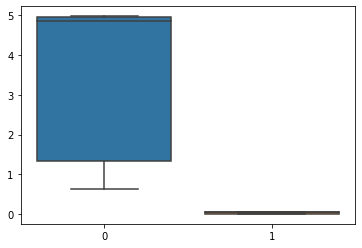

In [11]:
sns.boxplot(data=(jan['euribor3m'],feb['euribor3m']))

Congratulations! You've just discovered a first type of failure. 

It seems that the order of magnitude of the `euribor3m` feature has been divided by 100, resulting in a lack of precision. 

## Case 2: March



In [12]:
mar = pd.read_csv('../data/predict/mar-data.csv')
mar.head()

,age,job,marital,education,default,housing,loan,id,contact,month,day_of_week,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,28,management,single,university.degree,no,yes,no,14168,cellular,jun,thu,1,22,1,-1.7,94.055,-39.8,0.729,4991.6
1,30,admin.,married,basic.9y,no,yes,yes,20617,telephone,may,tue,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,technician,married,professional.course,no,no,no,600,cellular,apr,fri,2,999,0,-1.8,93.075,-47.1,1.405,5099.1
3,28,management,married,university.degree,no,no,no,40252,telephone,jun,mon,4,999,0,1.4,94.465,-41.8,4.947,5228.1
4,32,management,single,university.degree,no,no,no,35499,cellular,jul,mon,6,999,0,1.4,93.918,-42.7,4.962,5228.1


In [13]:
mar_final = data_prep(mar)

In [14]:
predictions = model.predict(mar_final)
mar_final['id'] = mar['id']
mar_final['prediction']=pd.Series(predictions)
model_performance(mar_final,'mar')

ValueError: X has 12 features per sample; expecting 13

This month, the model was not able to produce results. Why is that the case?

**Exercise:** Compare the schema of March with the one of January

In [15]:
#Solution

set_jan = set(jan.dtypes.to_dict().keys())
set_mar = set(mar.dtypes.to_dict().keys())

diff = set_jan - set_mar
print(diff)

{'poutcome'}


This is another common failure in a model: the data is no longer available, because of a change in its name, its format, or simply because it was removed from the database.

## Case 3: April

In [16]:
apr = pd.read_csv('../data/predict/apr-data.csv')
apr.head()

,age,job,marital,education,default,housing,loan,id,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,52,management,married,university.degree,no,no,no,8302,cellular,may,fri,5,999,0,nonexistent,-1.8,93.876,-40.0,0.684,5008.7
1,45,management,married,unknown,no,yes,no,1681,cellular,apr,tue,3,7,0,nonexistent,-1.8,93.749,-34.6,0.642,5008.7
2,37,blue-collar,married,unknown,no,no,no,21401,telephone,may,tue,3,999,1,failure,1.1,93.994,-36.4,4.857,5191.0
3,29,admin.,married,university.degree,no,yes,no,24305,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
4,47,blue-collar,married,unknown,unknown,no,no,38068,telephone,may,tue,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [17]:
apr_final = data_prep(apr)

In [18]:
predictions = model.predict(apr_final)
apr_final['id'] = apr['id']
apr_final['prediction']=pd.Series(predictions)
model_performance(apr_final,'apr')

The precision of the model in apr was of 0.36
This results in a profit of $900


**Exercise:** Compare the distribution of the column `poutcome` in jan, feb and apr. Is there something different?

In [19]:
#Solution
apr_poutcome = apr[apr['poutcome'] != 'nonexistent']
jan_poutcome = jan[jan['poutcome'] != 'nonexistent']
feb_poutcome = feb[feb['poutcome'] != 'nonexistent']

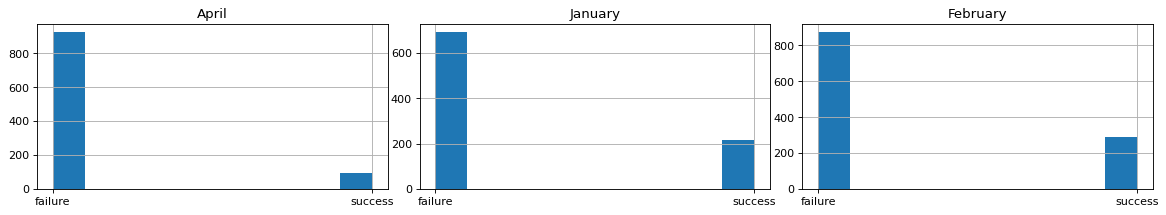

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 6), dpi=80)

ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
apr_poutcome['poutcome'].hist()
plt.title("April")
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
jan_poutcome['poutcome'].hist()
plt.title("January")
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
feb_poutcome['poutcome'].hist()
plt.title("February")
plt.show()


As you can see, the data is skewed and the success category is underrepresented in the `poutcome` column. The weight of the poutome_success is too important compared to other variables. However in April, less individuals with this attribute were in the dataset, we lost a key feature of the model. 

In [21]:
print(jan_final['poutcome_success'].skew())
print(feb_final['poutcome_success'].skew())
print(apr_final['poutcome_success'].skew())

5.149078276333302
5.145101437438898
7.731794860013117


### Well done!

You have discover some of the many so-called `datastrophes` that may happen in your data pipelines. Now, let's see how we could prevent them. 
